# auto reload utility and models

In [87]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



# Import all necessary library and packages

In [88]:

import string

import nltk
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt 

from sklearn.pipeline import Pipeline 
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold 
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# download NLTK resources

In [89]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Utility Functions

In [90]:
wordnet_lemmatizer = WordNetLemmatizer()

In [91]:
def clean_text(text: str):
    # removes upper cases
    text = text.lower()
    
    # removes punctuation
    for char in string.punctuation:
        text = text.replace(char, "")
    
    #lematize the words and join back into string text
    text = " ".join([wordnet_lemmatizer.lemmatize(word) for word in word_tokenize(text)])
    return text

# Load data

In [92]:
data = pd.read_csv('imdb_labelled.txt', sep='\t', names=['review', 'label'])
data.head(5)

,review,label
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1


In [93]:
data.iloc[0]['review']

'A very, very, very slow-moving, aimless movie about a distressed, drifting young man.  '

# create labels (Both positive and negative)

In [94]:
data['sentiment'] = data["label"].apply(lambda x: "positive" if x else "negative")
data.head()

,review,label,sentiment
0,"A very, very, very slow-moving, aimless movie ...",0,negative
1,Not sure who was more lost - the flat characte...,0,negative
2,Attempting artiness with black & white and cle...,0,negative
3,Very little music or anything to speak of.,0,negative
4,The best scene in the movie was when Gerardo i...,1,positive


# check Missing Values

In [95]:
data.isnull().sum()

review       0
label        0
sentiment    0
dtype: int64

# Label frequency

positive    386
negative    362
Name: sentiment, dtype: int64



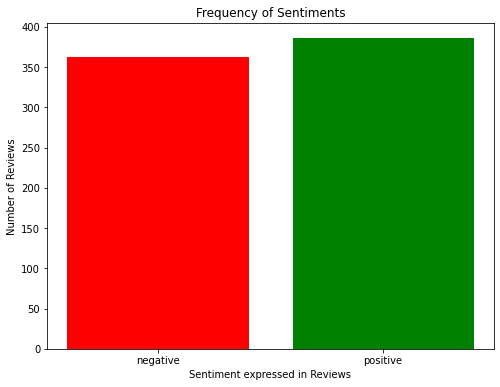

In [96]:

Index = [1, 0]

print(data["sentiment"].value_counts())
print()

barlist = plt.bar(Index, data["sentiment"].value_counts())

plt.title("Frequency of Sentiments")
plt.xticks(Index, ['positive', 'negative'])
plt.ylabel('Number of Reviews')
plt.xlabel('Sentiment expressed in Reviews')

barlist[Index[1]].set_color('green')
barlist[Index[0]].set_color('red')
plt.show()

# Clean Data

In [97]:
data['clean_review'] = data["review"].apply(clean_text)
data.head()

,review,label,sentiment,clean_review
0,"A very, very, very slow-moving, aimless movie ...",0,negative,a very very very slowmoving aimless movie abou...
1,Not sure who was more lost - the flat characte...,0,negative,not sure who wa more lost the flat character o...
2,Attempting artiness with black & white and cle...,0,negative,attempting artiness with black white and cleve...
3,Very little music or anything to speak of.,0,negative,very little music or anything to speak of
4,The best scene in the movie was when Gerardo i...,1,positive,the best scene in the movie wa when gerardo is...


# Text Preprocessing

Observe count Vectorizer

In [98]:

count_vectorizer = CountVectorizer(ngram_range=(1,1),lowercase=True, stop_words='english')
count_data = count_vectorizer.fit_transform(data["clean_review"])
cv_dataframe = pd.DataFrame(count_data.toarray(), columns=count_vectorizer.get_feature_names())

cv_dataframe.head()

,010,10,1010,110,12,15,18th,1928,1947,1948,...,younger,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


observe Tfidf

In [99]:
tf_idf_vec = TfidfVectorizer(use_idf=True, 
                        smooth_idf=True,  
                        ngram_range=(1,1),stop_words='english')

tf_idf_data = tf_idf_vec.fit_transform(data["clean_review"])
tf_idf_dataframe = pd.DataFrame(tf_idf_data.toarray(), columns=tf_idf_vec.get_feature_names())
tf_idf_dataframe.head()

,010,10,1010,110,12,15,18th,1928,1947,1948,...,younger,youre,youthful,youtube,youve,yun,zillion,zombie,zombiestudents,zombiez
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [100]:

X = data["clean_review"]
y = data['label']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [101]:
print(f"train shape input:{x_train.shape}, output:{y_train.shape}")
print(f"test shape  input:{x_test.shape}, output:{y_test.shape}")

train shape input:(598,), output:(598,)
test shape  input:(150,), output:(150,)


# Train CountVectorizer and MultinomialNB

# Initialise Pipeline with count vectorizer

In [102]:
cv_NB = Pipeline([
      ('bow', CountVectorizer(analyzer=clean_text, stop_words="english")),
      ('classifier', MultinomialNB())
])

In [103]:
cv_NB.fit(x_train, y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function clean_text at 0x0000026D62251510>,
                                 stop_words='english')),
                ('classifier', MultinomialNB())])

In [104]:
y_pred = cv_NB.predict(x_test) #predict testing data

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.49      0.54        80
           1       0.52      0.64      0.58        70

    accuracy                           0.56       150
   macro avg       0.57      0.57      0.56       150
weighted avg       0.57      0.56      0.56       150



# Running Cross Validation with CountVectorizer and MultinomialNB

In [105]:
accuracy = []

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=100) 
skf.get_n_splits(X, y) 

for train_index, test_index in skf.split(X, y):
    x_train_fold, x_test_fold = X.iloc[train_index], X.iloc[test_index] 
    y_train_fold, y_test_fold = y.iloc[train_index], y.iloc[test_index]

    cv_NB.fit(x_train_fold, y_train_fold)
    result = cv_NB.score(x_test_fold, y_test_fold)
    accuracy.append(result)

accuracy = np.array(accuracy)

# Print the output
print('List of first 10 possible accuracy:')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

print('\nMetrics that were obtained from this model:')
print(f' Maximum Accuracy:   {accuracy.max()*100:.2f}%') 
print(f' Minimum Accuracy:   {accuracy.min()*100:.2f}%') 
print(f' Mean Accuracy:   {accuracy.mean()*100:.2f}%') 
print(f' Standard Deviation: {accuracy.std():.4f}')

List of first 10 possible accuracy:
  1. 0.4667
  2. 0.6000
  3. 0.5467
  4. 0.5467
  5. 0.5733
  6. 0.5600
  7. 0.5467
  8. 0.5200
  9. 0.6081
 10. 0.6757

Metrics that were obtained from this model:
 Maximum Accuracy:   67.57%
 Minimum Accuracy:   46.67%
 Mean Accuracy:   56.44%
 Standard Deviation: 0.0530


# Train Tfidf 

# Initialise Pipeline with Tfidf Using MultinomialNB

In [106]:
vectorizer = Pipeline([
   ('Term freq', TfidfVectorizer()),
   ('classifier', MultinomialNB()),
   ])

# Run Cross Validation and Tfidf with MultinomialNB

In [107]:
accuracy = []
stratifiedkf_predict = StratifiedKFold(n_splits=10, shuffle=True, random_state=100)
stratifiedkf_predict.get_n_splits(X, y)

for train_index, test_index in stratifiedkf_predict.split(X, y):
    
    x_train, x_test = X.iloc[train_index], X.iloc[test_index] 
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    vectorizer.fit(x_train, y_train)
    result = vectorizer.score(x_test, y_test)
    accuracy.append(result)
    
accuracy = np.array(accuracy)

# Print the output
print('List of first 10 possible accuracy:')
for index, acc in enumerate(accuracy[:10]):
    print(f"{index+1:3d}. {acc:.4f}")

print('\nMetrics that were obtained from this model:')
print(f' Maximum Accuracy:   {accuracy.max()*100:.2f}%') 
print(f' Minimum Accuracy:   {accuracy.min()*100:.2f}%') 
print(f' Mean Accuracy:   {accuracy.mean()*100:.2f}%') 
print(f' Standard Deviation: {accuracy.std():.4f}')
print(accuracy)

List of first 10 possible accuracy:
  1. 0.7600
  2. 0.8400
  3. 0.7067
  4. 0.8133
  5. 0.7600
  6. 0.8000
  7. 0.8533
  8. 0.7733
  9. 0.7568
 10. 0.7973

Metrics that were obtained from this model:
 Maximum Accuracy:   85.33%
 Minimum Accuracy:   70.67%
 Mean Accuracy:   78.61%
 Standard Deviation: 0.0415
[0.76       0.84       0.70666667 0.81333333 0.76       0.8
 0.85333333 0.77333333 0.75675676 0.7972973 ]
